## Strings, Input and Output
1. print/input
2. f-strings
3. formating strings
4. read/write files
5. numpy/pandas
6. astropy read_fits
7. hdf5
8. Reading filenames in python
9. Annotating plots

#### 1) print/input
The print() and input() functions allow text to be written to standard output (the screen) and taken from standard input (the keyboard).

In [2]:
print("The next line will ask for input")
x=input("Input a number:")
print(x,"is a string unless we convert it to ", float(x))

The next line will ask for input


Input a number: 45


45 is a string unless we convert it to  45


#### 2) f-strings 
There are a few different ways to change the ways strings behave. This different types of strings are created by putting a letter in front of the quotes mark. The most useful of these are f-strings. An f-string allows one to place variables into your string and format them. They are super convient. There are also raw-strings. In normal strings the \ is used to denote special characters like endline (\n) or tab (\t) like  which make all special characters just text. They are mostly useful for passing LaTex markup to matplotlip.

In [3]:
x=3
print("The value of x is \t {10*x}")  # \t is tab \n is endline
print(f"The value of x is \t {10*x}") #an f-string allows you to pass a value in {}
print(r"The value of x is \t {10*x}") #a raw-string ignores special characters 

The value of x is 	 {10*x}
The value of x is 	 30
The value of x is \t {10*x}


In [4]:
import numpy as np
print(f"The value of pi is {np.pi}")
print(f"The value of pi is {np.pi:.3f}")
print(f"The value of pi is {np.pi:.5f}")

The value of pi is 3.141592653589793
The value of pi is 3.142
The value of pi is 3.14159


#### 3) String Formating
The general way to format strings in Python is to use the format method. This can insert variables like the f-string and format how they appear. The format codes are totally not obvious and you just have to look them up.

In [5]:
pi=np.pi
G=5.67e-11
mill = 1_000_000
print("The variables {:.2e} and {:.2e} and {:8e}".format(pi,G,mill))
print("The variables {:.2f} and {:.2f} and {:10}".format(pi,G,mill))
print("The variables {:.2} and {:.2e} and {:,}".format(pi,G,mill))
print("{:10.7}  {:>10}  {:>10.2%}".format(pi,G,0.8))     # > left justified
print("{:<10.3}  {:<10}  {:>10}".format(pi,G,mill)) # < right justified


The variables 3.14e+00 and 5.67e-11 and 1.000000e+06
The variables 3.14 and 0.00 and    1000000
The variables 3.1 and 5.67e-11 and 1,000,000
  3.141593    5.67e-11      80.00%
3.14        5.67e-11       1000000


#### 4) Reading/Writing Files
Python has functions to read and write files. You will not need to use them if you have data in some standard format like cvs, fits, pkl or hdf5. However, if you ever need to you can read and write files using the open function. This function opens an instance of a file which then has methods for reading and writing to the file. It is common to open a file in a with block so that it is automatically closed when you are done. The open function takes the filename and a letter to signify if you want to read, write or append to the file. Write will create a new file. 

In [6]:
#to read a file 
v1=[]
v2=[]
v3=[]
with open('hubble1929_table1.dat','r') as f:
    for line in f:  #read one line from the file or line=f.readline()
        if line[0]!='#': #check that it isn't a comment
            vals=line.split()  #split the line by blank spaces
            v1.append(int(vals[0]))
            v2.append(float(vals[1]))
            v3.append(int(vals[2]))

print(v2)

[0.032, 0.034, 0.214, 0.263, 0.275, 0.275, 0.45, 0.5, 0.5, 0.63, 0.8, 0.9, 0.9, 0.9, 0.9, 1.0, 1.1, 1.1, 1.4, 1.7, 2.0, 2.0, 2.0, 2.0]


In [ ]:
#to write a file
with open('tmp.dat','w') as f:
    for i in range(len(v1)):
        f.write(f'{v1[i]:10} {v2[i]:10.3f} {v3[i]:10} \n')  
        

In [7]:
!head tmp.dat 

1.000e+00 3.200e-02 1.700e+02
2.000e+00 3.400e-02 2.900e+02
6.822e+03 2.140e-01 -1.300e+02
5.980e+02 2.630e-01 -7.000e+01
2.210e+02 2.750e-01 -1.850e+02
2.240e+02 2.750e-01 -2.200e+02
5.194e+03 4.500e-01 2.000e+02
4.736e+03 5.000e-01 2.900e+02
5.457e+03 5.000e-01 2.700e+02
4.449e+03 6.300e-01 2.000e+02


#### 5) numpy and pandas
Of course column data is very common so pleny of packages have functions to read it. Numpy has np.loadtxt(), while pandas has pd.read_csv().  These functions have lots of options that make them likely to be able to read any column seperated file, as long as you choose the right ones. If you have missing values you will nee to use np.genfrontxt() instead. If your columns are fixed with pd.read_csv() won't work, you can use pd.read_fwf() or numpy.

You can also write these files using np.savetxt() or df.to_csv(). 

In [8]:
import pandas as pd
data=np.loadtxt('hubble1929_table1.dat', comments='#')
print(data[:,1])
np.savetxt('tmp.dat', data, fmt='%8d, %8.3f, %8d')
!head -5 tmp.dat
df=pd.read_csv('tmp.dat',  delimiter=',',  #need the commas 
                   names=['obj','dis','vel'])
df.head()


[0.032 0.034 0.214 0.263 0.275 0.275 0.45  0.5   0.5   0.63  0.8   0.9
 0.9   0.9   0.9   1.    1.1   1.1   1.4   1.7   2.    2.    2.    2.   ]
       1,    0.032,      170
       2,    0.034,      290
    6822,    0.214,     -130
     598,    0.263,      -70
     221,    0.275,     -185


,obj,dis,vel
0,1,0.032,170
1,2,0.034,290
2,6822,0.214,-130
3,598,0.263,-70
4,221,0.275,-185


#### 6) astropy fits
Astronomy uses a special file structure called a fits file to store images and tables. The astropy package provides readers and writers for this file type. There are 2 things that can make fits files complicated. First, they have a header which may contain useful information. Second, they can contain multiple images, tables or combinations of the two. As long as you have just one table or image in the file and don't need the header you can just read the file with the Table.read() method. 

In [9]:
import astropy
from astropy.io import fits

fits_image_filename = astropy.io.fits.util.get_testdata_filepath('test0.fits')
hdul = fits.open(fits_image_filename)
hdul.info()

Filename: /Users/ari/miniforge3/lib/python3.10/site-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


In [10]:
hdul[0].header['DATE']


'01/04/99'

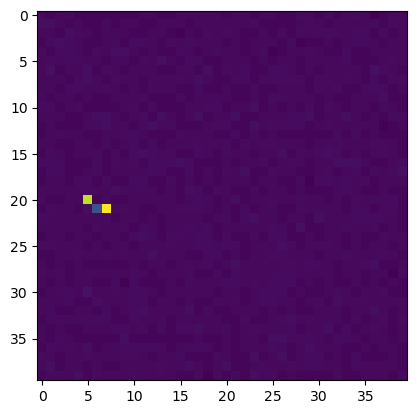

In [11]:
data = hdul[1].data

import matplotlib.pyplot as plt
plt.imshow(data)

Filename: /Users/ari/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


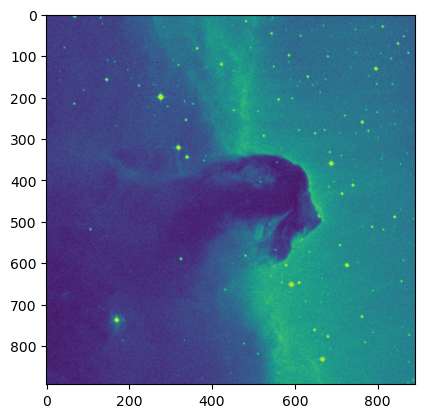

In [12]:
from astropy import utils
image_file = astropy.utils.data.get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')
astropy.io.fits.info(image_file)
image_data = fits.getdata(image_file, ext=0)

plt.imshow(image_data)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image_data)

In [13]:
#a file with a single table can be read using the Table class
from astropy.table import Table

tab = Table.read('edr3_nearby_brightest.fits') #tab is an astropy table
df = tab.to_pandas() #this converts it to a pandas dataframe

#in general one has to open the file and see what it there
with aio.fits.open('edr3_nearby_brightest.fits') as hdul:
    print(hdul.info(),'\n')
    print(hdul[0].header,'\n')
    print(f'The TTYPE1 for file 1 is {hdul[1].header["TTYPE1"]} \n')
    data = hdul[1].data #tables can't be primary so it is the 2nd entry
    cols = hdul[1].columns

NameError: name 'aio' is not defined

In [ ]:
print(cols.names)
print(data['Gmag'])

In [ ]:
#creating a new hdul and saving it
import numpy as np
n = np.arange(100.0) #some numpy array
hdu = aio.fits.PrimaryHDU(n) #make it a primary HDU
hdul = aio.fits.HDUList([hdu]) #create an HDUList
hdul.writeto('tmp.fits')  #write the first file

#a astropy table can be written straight to fits format
tab.write('tmp2.fits',format='fits') #note will give error if file exists

##### 7) hdf5 files 
Another common file type is hdf5. Like fits files these are a very general way to store data and particularly good for large amounts of data.  Many numerical simulations save their outputs in hdf5 file format. Packages for analyzing simulations will read these files, like yt or pynbody. But if you need to read the file directly you can use h5py.

In [14]:
import h5py

f = h5py.File('fof_subhalo_tab_015.hdf5', 'r')
print(list(f.keys())) #Groups in the file
print(f['Group'].keys()) 
ds = f['Group/Group_M_Crit200'] #this is an actual dataset
print(ds.shape,ds.dtype,ds[0])


['Config', 'Group', 'Header', 'IDs', 'Parameters', 'Subhalo']
<KeysViewHDF5 ['GroupCM', 'GroupFirstSub', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupVel', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200']>
(447,) float64 26.13541194919416


Text(0.5, 0, 'Group $M_{Crit200}$')

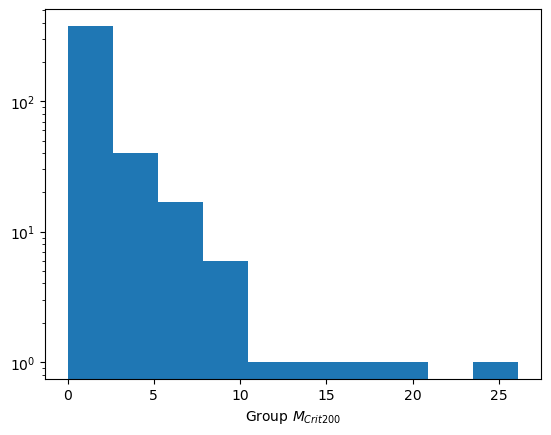

In [15]:
plt.hist(ds)
plt.yscale('log')
plt.xlabel('Group $M_{Crit200}$')

#### 8) Getting filenames in python
Python offers a number of ways to navigate your file system. The easiest is the os package which gives you functions that are very similar to what you can do on the command line. In order to use wildcards use the glob package.

In [16]:
import os
os.chdir('/Users/ari/Documents/python/bootcamp_notebooks')
print(f'current directory is {os.getcwd()} \n')
os.chdir('../')
print(f'now in {os.getcwd()} directory\n')
os.chdir('bootcamp_notebooks')
print(os.listdir('/'),'\n')
files = os.listdir() #if listing not the current directory will have to add path 
print(files[20])
size = os.path.getsize(files[20])
print(f'the size of this file is {size} bytes \n')
os.path.isfile('2d_plotting_examples.ipynb')

current directory is /Users/ari/Documents/python/bootcamp_notebooks 

now in /Users/ari/Documents/python directory

['home', 'usr', 'bin', 'sbin', '.file', 'etc', 'var', 'Library', 'System', '.VolumeIcon.icns', 'private', '.vol', 'Users', 'Applications', 'opt', 'dev', 'Volumes', 'tmp', 'cores'] 

fof_subhalo_tab_015.hdf5
the size of this file is 365784 bytes 



True

In [ ]:
import glob 

print(glob.glob('*.dat'))
print(glob.glob('Numpy*'))

#### 9) Annotating plots
Finally we may want to put strings on our plots. Besides using the label and title methods we can text and annotate to and text anywhere on a matplotlib plot.  We can also use LaTex markup to get greek letters and math symbols. 

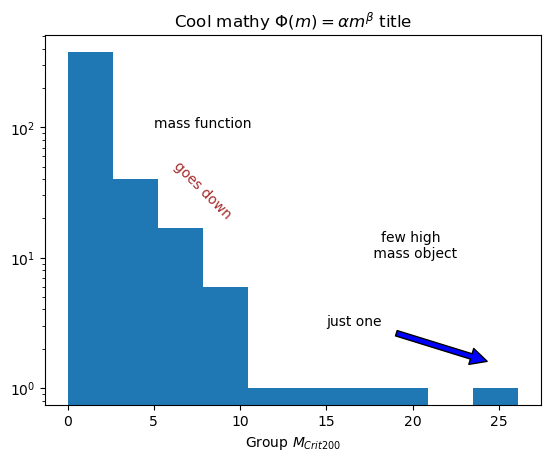

In [17]:
plt.hist(ds)
plt.title(r'Cool mathy $\Phi(m) = \alpha m^{\beta}$ title') #raw-string
plt.yscale('log')
plt.xlabel('Group $M_{Crit200}$')
plt.text(5,100,'mass function')
plt.text(6,20,'goes down',rotation=-45,color='brown')
plt.annotate('few high \n mass object',(20,10),ha='center')
plt.annotate('just one',(25,1.5),xytext=(15,3),
             arrowprops=dict(facecolor='blue', shrink=0.1))
plt.show()